# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
!pip3 install box2d
import random
import tensorflow as tf
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
State shape:  (8,)
Number of actions:  4


Before running the next code cell, familiarize yourself with the code in **Step 2** and **Step 3** of this notebook, along with the code in `dqn_agent.py` and `model.py`.  Once you have an understanding of how the different files work together, 
- Define a neural network architecture in `model.py` that maps states to action values.  This file is mostly empty - it's up to you to define your own deep Q-network!
- Finish the `learn` method in the `Agent` class in `dqn_agent.py`.  The sampled batch of experience tuples is already provided for you; you need only use the local and target Q-networks to compute the loss, before taking a step towards minimizing the loss.

Once you have completed the code in `dqn_agent.py` and `model.py`, run the code cell below.  (_If you end up needing to make multiple changes and get unexpected behavior, please restart the kernel and run the cells from the beginning of the notebook!_)

You can find the solution files, along with saved model weights for a trained agent, in the `solution/` folder.  (_Note that there are many ways to solve this exercise, and the "solution" is just one way of approaching the problem, to yield a trained agent._)

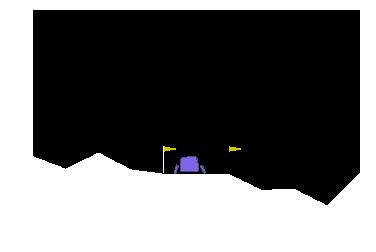

In [ ]:
from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

# watch an untrained agent
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for j in range(200):
    action = agent.act(state)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

In [ ]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Current loss: 4.430
Current loss: 4.256
Current loss: 4.075
Current loss: 3.714
Current loss: 4.110
Current loss: 3.603
Current loss: 3.918
Current loss: 3.488
Current loss: 3.912
Current loss: 4.481
Current loss: 174.409re: -242.90
Current loss: 4.993
Current loss: 6.351
Current loss: 160.386
Current loss: 174.476
Current loss: 160.408
Current loss: 3.781
Current loss: 173.156
Current loss: 17.989
Current loss: 160.641
Current loss: 4.038
Current loss: 18.730
Current loss: 17.155
Current loss: 172.448
Current loss: 5.426
Current loss: 173.720
Current loss: 4.985core: -180.36
Current loss: 5.073
Current loss: 160.652
Current loss: 329.187
Current loss: 161.325
Current loss: 161.881
Current loss: 173.965
Current loss: 18.751
Current loss: 4.889
Current loss: 4.297
Current loss: 16.802
Current loss: 18.464
Current loss: 3.742
Current loss: 18.228
Current loss: 173.349
Current loss: 4.500
Current loss: 4.415
Current loss: 19.706
Current loss: 4.029
Current loss: 5.124
Current loss: 5.579


Current loss: 477.133
Current loss: 10.194
Current loss: 163.020
Current loss: 7.090
Current loss: 18.245
Current loss: 162.593
Current loss: 166.265
Current loss: 323.205
Current loss: 171.445
Current loss: 325.630
Current loss: 27.102
Current loss: 337.849
Current loss: 162.038
Current loss: 6.586
Current loss: 9.917
Current loss: 9.246
Current loss: 165.360
Current loss: 192.428
Current loss: 33.881
Current loss: 4.626
Current loss: 9.471
Current loss: 323.467
Current loss: 13.561
Current loss: 324.826
Current loss: 179.197ore: -202.89
Current loss: 162.149
Current loss: 498.242
Current loss: 15.825
Current loss: 23.643
Current loss: 12.223
Current loss: 165.580
Current loss: 6.135
Current loss: 336.624
Current loss: 472.884
Current loss: 304.325
Current loss: 323.676
Current loss: 153.389
Current loss: 325.319
Current loss: 18.231
Current loss: 5.806
Current loss: 162.291
Current loss: 6.107
Current loss: 162.830
Current loss: 7.269
Current loss: 14.878
Current loss: 13.000
Current

Current loss: 173.926
Current loss: 321.800
Current loss: 5.201
Current loss: 4.117
Current loss: 34.481
Current loss: 320.252
Current loss: 330.631ore: -191.69
Current loss: 7.089
Current loss: 176.052
Current loss: 477.974
Current loss: 164.174
Current loss: 5.712
Current loss: 8.632
Current loss: 319.654
Current loss: 12.961
Current loss: 6.663
Current loss: 161.080
Current loss: 23.447
Current loss: 474.797
Current loss: 3.676
Current loss: 162.390
Current loss: 169.477
Current loss: 161.552
Current loss: 316.328
Current loss: 15.188
Current loss: 164.569
Current loss: 9.536Score: -190.82
Current loss: 163.323
Current loss: 165.191
Current loss: 169.512
Current loss: 165.923
Current loss: 19.429
Current loss: 164.853
Current loss: 6.145
Current loss: 190.639
Current loss: 32.861
Current loss: 191.296
Current loss: 17.509
Current loss: 325.988
Current loss: 8.032
Current loss: 8.727
Current loss: 36.027
Current loss: 219.037
Current loss: 236.913
Current loss: 5.170
Current loss: 19

Current loss: 323.712
Current loss: 168.843ore: -200.97
Current loss: 5.738
Current loss: 17.116
Current loss: 644.541
Current loss: 205.809
Current loss: 6.691
Current loss: 5.663
Current loss: 163.246
Current loss: 322.860
Current loss: 172.906
Current loss: 8.074
Current loss: 305.061
Current loss: 6.119
Current loss: 12.637
Current loss: 240.970
Current loss: 5.249Score: -199.23
Current loss: 460.416
Current loss: 14.967
Current loss: 12.770
Current loss: 219.302
Current loss: 166.330
Current loss: 45.910
Current loss: 168.181
Current loss: 164.348
Current loss: 34.140
Current loss: 160.969
Current loss: 11.094
Current loss: 166.314
Current loss: 10.264
Current loss: 472.446
Current loss: 179.204
Current loss: 162.190
Current loss: 9.822
Current loss: 166.356
Current loss: 219.788
Current loss: 16.367
Current loss: 166.398
Current loss: 173.799
Current loss: 162.760ore: -198.59
Current loss: 5.119
Current loss: 165.979
Current loss: 484.200
Current loss: 319.971
Current loss: 304.1

Current loss: 170.526
Current loss: 13.723
Current loss: 12.340
Current loss: 367.854
Current loss: 163.049
Current loss: 9.776
Current loss: 162.121
Current loss: 6.029
Current loss: 7.500
Current loss: 320.395
Current loss: 161.028
Current loss: 159.907
Current loss: 165.253
Current loss: 315.989ore: -206.31
Current loss: 9.674
Current loss: 326.287
Current loss: 72.345
Current loss: 160.230
Current loss: 198.575
Current loss: 318.155
Current loss: 35.299
Current loss: 4.902
Current loss: 8.565
Current loss: 192.507
Current loss: 167.302
Current loss: 219.196
Current loss: 29.542
Current loss: 7.599
Current loss: 171.030
Current loss: 344.010
Current loss: 6.823
Current loss: 323.096ore: -206.01
Current loss: 4.115
Current loss: 165.717
Current loss: 17.263
Current loss: 13.446
Current loss: 477.452
Current loss: 163.758
Current loss: 164.375
Current loss: 22.126
Current loss: 339.541
Current loss: 10.567
Current loss: 474.545
Current loss: 14.139
Current loss: 183.940
Current loss: 

Current loss: 19.413
Current loss: 4.760
Current loss: 317.272
Current loss: 11.229
Current loss: 13.987
Current loss: 317.863
Current loss: 162.071
Current loss: 163.042
Current loss: 180.187
Current loss: 173.432
Current loss: 8.082
Current loss: 11.456
Current loss: 371.764
Current loss: 171.976
Current loss: 6.134
Current loss: 9.894
Current loss: 324.116
Current loss: 7.286
Current loss: 173.330ore: -206.23
Current loss: 178.724
Current loss: 161.445
Current loss: 5.762
Current loss: 5.006
Current loss: 7.781
Current loss: 4.703
Current loss: 174.210
Current loss: 171.151
Current loss: 380.979
Current loss: 10.603
Current loss: 166.287
Current loss: 4.342
Current loss: 324.491
Current loss: 341.040
Current loss: 18.032
Current loss: 168.572
Current loss: 171.542
Current loss: 160.294
Current loss: 314.786
Current loss: 16.158
Current loss: 486.086ore: -205.72
Current loss: 185.989
Current loss: 21.200
Current loss: 7.704
Current loss: 184.614
Current loss: 14.402
Current loss: 8.5

Current loss: 320.142
Current loss: 6.914
Current loss: 167.934
Current loss: 325.976
Current loss: 7.363
Current loss: 289.983core: -201.36
Current loss: 161.135
Current loss: 18.631
Current loss: 9.613
Current loss: 11.362
Current loss: 5.158
Current loss: 486.258
Current loss: 4.808
Current loss: 316.576
Current loss: 7.224
Current loss: 9.261
Current loss: 168.338
Current loss: 160.452
Current loss: 166.611
Current loss: 28.453
Current loss: 6.383
Current loss: 474.578
Current loss: 6.047
Current loss: 5.607
Current loss: 13.287
Current loss: 378.652
Current loss: 163.275core: -203.13
Current loss: 201.441
Current loss: 322.183
Current loss: 324.092
Current loss: 331.739
Current loss: 335.731
Current loss: 107.891
Current loss: 6.936
Current loss: 198.247
Current loss: 321.187
Current loss: 9.730
Current loss: 318.887
Current loss: 160.496
Current loss: 354.856
Current loss: 18.341Score: -202.94
Current loss: 160.243
Current loss: 9.472
Current loss: 6.955
Current loss: 162.966
Cur

Current loss: 5.350
Current loss: 170.092
Current loss: 317.207
Current loss: 474.453
Current loss: 32.225
Current loss: 14.201
Current loss: 160.446
Current loss: 12.841
Current loss: 18.074Score: -203.11
Current loss: 322.422
Current loss: 168.480
Current loss: 321.153
Current loss: 164.096
Current loss: 840.388
Current loss: 318.690
Current loss: 164.166
Current loss: 319.781
Current loss: 4.399
Current loss: 474.819
Current loss: 4.615
Current loss: 4.583
Current loss: 331.249
Current loss: 317.564
Current loss: 162.083
Current loss: 5.485
Current loss: 6.696
Current loss: 161.127
Current loss: 316.764
Current loss: 474.807
Current loss: 11.857
Current loss: 90.707
Current loss: 171.532core: -202.67
Current loss: 321.484
Current loss: 7.800
Current loss: 5.779
Current loss: 6.442
Current loss: 171.758
Current loss: 164.159
Current loss: 3.578
Current loss: 170.346
Current loss: 164.776
Current loss: 168.533
Current loss: 11.003
Current loss: 165.451
Current loss: 10.754
Current los

Current loss: 11.618Score: -201.66
Current loss: 317.368
Current loss: 5.286
Current loss: 6.425
Current loss: 377.966
Current loss: 8.312
Current loss: 162.956
Current loss: 189.469
Current loss: 359.089
Current loss: 378.135
Current loss: 159.775
Current loss: 160.240
Current loss: 170.059
Current loss: 471.856
Current loss: 6.566
Current loss: 160.810
Current loss: 11.496Score: -201.75
Current loss: 6.402
Current loss: 163.779
Current loss: 785.823
Current loss: 8.070
Current loss: 164.394
Current loss: 4.135
Current loss: 4.262
Current loss: 319.307
Current loss: 479.381
Current loss: 319.656
Current loss: 316.574
Current loss: 8.341
Current loss: 18.753
Current loss: 4.338
Current loss: 164.727
Current loss: 321.969
Current loss: 11.627
Current loss: 40.081
Current loss: 25.468
Current loss: 317.543core: -199.62
Current loss: 8.203
Current loss: 351.207
Current loss: 21.557
Current loss: 7.623
Current loss: 6.635
Current loss: 160.268
Current loss: 13.980
Current loss: 322.883
Cur

Current loss: 549.817
Current loss: 316.673
Current loss: 604.377
Current loss: 36.783
Current loss: 323.614
Current loss: 15.518
Current loss: 161.447
Current loss: 183.531
Current loss: 320.444
Current loss: 76.937Score: -198.69
Current loss: 20.816
Current loss: 161.651
Current loss: 37.673
Current loss: 8.856
Current loss: 162.265
Current loss: 12.944
Current loss: 6.024
Current loss: 6.004
Current loss: 18.700
Current loss: 185.486
Current loss: 184.329
Current loss: 7.730
Current loss: 29.233
Current loss: 8.331
Current loss: 328.921
Current loss: 7.548 Score: -197.71
Current loss: 475.460
Current loss: 11.443
Current loss: 4.245
Current loss: 7.126
Current loss: 104.629
Current loss: 4.165
Current loss: 16.442
Current loss: 317.500
Current loss: 11.579
Current loss: 5.052
Current loss: 165.519
Current loss: 10.917
Current loss: 323.523
Current loss: 4.273
Current loss: 160.934
Current loss: 169.366
Current loss: 11.538
Current loss: 318.601
Current loss: 7.963
Current loss: 4.74

Current loss: 316.717
Current loss: 5.551
Current loss: 5.388
Current loss: 18.634
Current loss: 3.877
Current loss: 8.366
Current loss: 4.728
Current loss: 316.257
Current loss: 5.822
Current loss: 161.720core: -194.57
Current loss: 17.363
Current loss: 384.027
Current loss: 12.584
Current loss: 8.138
Current loss: 472.204
Current loss: 5.684
Current loss: 619.227
Current loss: 164.302
Current loss: 4.454
Current loss: 327.420
Current loss: 4.868
Current loss: 4.584
Current loss: 5.159
Current loss: 327.671
Current loss: 26.100
Current loss: 170.298
Current loss: 7.013
Current loss: 13.637Score: -195.31
Current loss: 5.807
Current loss: 172.130
Current loss: 222.128
Current loss: 8.494
Current loss: 477.294
Current loss: 160.711
Current loss: 4.889
Current loss: 161.249
Current loss: 17.121
Current loss: 3.956
Current loss: 4.477
Current loss: 6.685
Current loss: 317.748
Current loss: 3.975
Current loss: 168.627
Current loss: 4.887
Current loss: 8.740
Current loss: 160.197
Current los

Current loss: 8.409 Score: -194.38
Current loss: 10.501
Current loss: 323.545
Current loss: 14.152
Current loss: 478.250
Current loss: 10.856
Current loss: 164.162
Current loss: 318.304
Current loss: 318.003
Current loss: 10.642
Current loss: 318.895
Current loss: 5.310
Current loss: 318.672
Current loss: 15.072
Current loss: 321.477
Current loss: 9.109
Current loss: 166.592
Current loss: 386.733
Current loss: 171.003
Current loss: 12.988
Current loss: 482.079core: -193.91
Current loss: 162.732
Current loss: 160.750
Current loss: 21.954
Current loss: 5.490
Current loss: 161.679
Current loss: 165.864
Current loss: 315.917
Current loss: 164.081
Current loss: 161.217
Current loss: 163.593
Current loss: 58.570
Current loss: 6.748
Current loss: 161.185
Current loss: 242.090
Current loss: 160.660
Current loss: 5.923
Current loss: 12.613
Current loss: 6.321
Current loss: 6.661
Current loss: 321.223
Current loss: 160.078
Current loss: 176.999
Current loss: 11.108
Current loss: 4.531
Current lo

Current loss: 6.075
Current loss: 169.521
Current loss: 319.044
Current loss: 10.902
Current loss: 440.441
Current loss: 160.083
Current loss: 4.064
Current loss: 164.003
Current loss: 15.257Score: -193.52
Current loss: 5.001
Current loss: 4.944
Current loss: 380.971
Current loss: 4.564
Current loss: 12.238
Current loss: 6.638
Current loss: 7.493
Current loss: 173.703
Current loss: 8.345
Current loss: 480.937
Current loss: 8.777
Current loss: 4.960
Current loss: 5.178
Current loss: 4.581
Current loss: 382.105
Current loss: 160.048
Current loss: 163.551
Current loss: 161.883
Current loss: 190.269
Current loss: 320.742
Current loss: 7.865 Score: -193.65
Current loss: 173.149
Current loss: 166.348
Current loss: 3.769
Current loss: 4.399
Current loss: 473.557
Current loss: 330.116
Current loss: 245.089
Current loss: 162.672
Current loss: 7.731
Current loss: 3.919
Current loss: 6.210
Current loss: 176.228
Current loss: 9.754
Current loss: 159.700
Current loss: 167.891
Current loss: 185.181


### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [ ]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    for j in range(200):
        action = agent.act(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN! 
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  